In [2]:
# Import Libraries # 
##################################################################################
import numpy as np
import keras
import matplotlib.pyplot as plt
##################################################################################

Using TensorFlow backend.


Size of Training Set: 60000
Shape of each Image: (28, 28)
Sample Labeled Image: 5


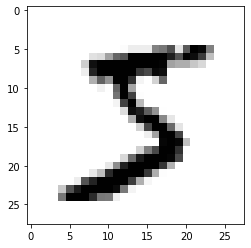

In [4]:
# Extract Data #
##################################################################################
# import data from keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Size of Training Set: ' + str(x_train.shape[0]))
print('Shape of each Image: ' + str(x_train.shape[1:]))
print('Sample Labeled Image: ' + str(y_train[0]))
plt.imshow(x_train[0], cmap=plt.cm.binary)

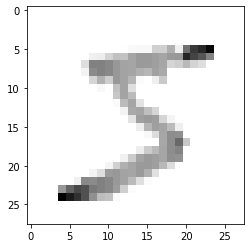

In [5]:
# Data Preprocessing #
##################################################################################
# normalize pixel values
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
##################################################################################
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [8]:
# Build Neural Network with Two Hidden Layers #
##################################################################################
model = keras.models.Sequential()
# add one input layer, two hidden layers, and one output layer
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
##################################################################################
# set optimizer, loss function, and metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
##################################################################################
# show model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train Model #
##################################################################################
# feed training set for 3 epochs
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/3





60000/60000 [==============================] - 6s 105us/step - loss: 0.2801 - acc: 0.9183
Epoch 2/3
60000/60000 [==============================] - 6s 107us/step - loss: 0.1187 - acc: 0.9639
Epoch 3/3
60000/60000 [==============================] - 6s 101us/step - loss: 0.0830 - acc: 0.9737


In [12]:
# Evaluate Model #
##################################################################################
# return model prediction and correct label
def predict_digit(i):
    y = model.predict(x_test)
    print('Model Prediction: ' + str(np.argmax(y[i])))
    print('Correct Label: ' + str(y_test[i]))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
##################################################################################
# calculate loss and accuracy on test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Model Loss: ' + str(val_loss))
print('Model Accuracy: ' + str(val_acc))

10000/10000 [==============================] - 0s 39us/step
Model Loss: 0.09384257782893256
Model Accuracy: 0.9706


Model Prediction: 0
Correct Label: 0


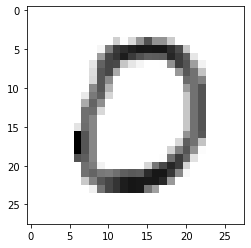

In [14]:
# sample prediction
predict_digit(10)